In [1]:
import time

from dgl.dataloading import GraphDataLoader
import torch

from prob import VRPDGLDataset
from solver import return2Depot
from utils import checkValid, routesPlot

Using backend: pytorch


In [2]:
def run(size):
    """
    A function to evaluate different algorithms

    Args:
        size(int): graph size
        algo (str): name of algorithm
        solver_args (tuple): args of solver
    """
    cnt = 0
    # device
    print("Device:")
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    print("  {}".format(device))
    # load test data
    print("\nLoad data...")
    print("  Graph size: {}".format(size))
    data = VRPDGLDataset(size=size, num_samples=1000)
    batch = 1
    dataloader = GraphDataLoader(data, batch_size=batch, shuffle=False)
    # init solver
    solver = return2Depot(size)
    # solve
    print("\nEvaluating:")
    for batch_data, batch_graph in dataloader:
        cnt += 1
        # to device
        batch_graph = batch_graph.to(device)
        batch_data["loc"] = batch_data["loc"].to(device)
        batch_data["demand"] = batch_data["demand"].to(device)
        batch_data["depot"] = batch_data["depot"].to(device)
        tick = time.time()
        batch_routes, batch_objs = solver.solve(batch_data, batch_graph)
        tock = time.time()
        for i in range(batch):
            obj = batch_objs[i]
            routes = batch_routes[i]
            depot = batch_data["depot"].cpu().detach().numpy()[i]
            loc = batch_data["loc"].cpu().detach().numpy()[i]
            demand = batch_data["demand"].cpu().detach().numpy()[i]
            # print results
            print("Obj Val: {:.4f}".format(obj))
            print("Routes:")
            for r in routes:
                print("  ", "->".join(map(str, r)))
            print("Time elpased: {:.4f} sec".format((tock - tick) / batch))
            # check valid
            assert checkValid(routes, depot, loc, demand), "Infeasible solution."
            # vis
            routesPlot(routes, depot, loc)
        # stop
        if cnt >= 3:
            break
        print()

Device:
  cuda

Load data...
  Graph size: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 237.36it/s]



Loading routing agent...
  [*] Loading model from ./attention_model/pretrained_tsp/tsp_20\epoch-99.pt

Loading return2depot agent...

Evaluating:
Obj Val: 21.6750
Routes:
   5
   10
   19
   6
   13
   4
   16
   7
   3
   2
   14
   11
   9
   1
   18
   17
   12
   0
   15
   8
Time elpased: 1.8939 sec


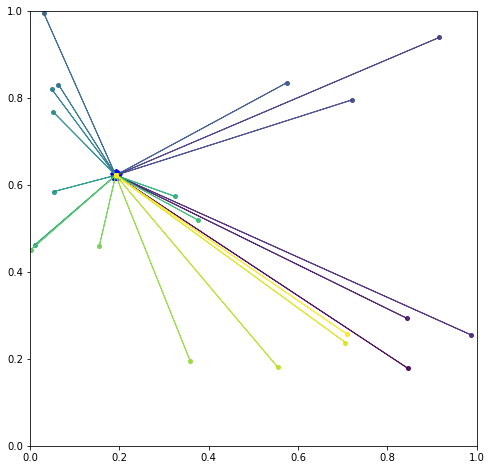


Obj Val: 21.3530
Routes:
   11
   12
   17
   16
   1
   2
   9
   13
   14
   0
   19
   18
   3
   15
   7
   10
   5
   8
   6
   4
Time elpased: 0.5090 sec


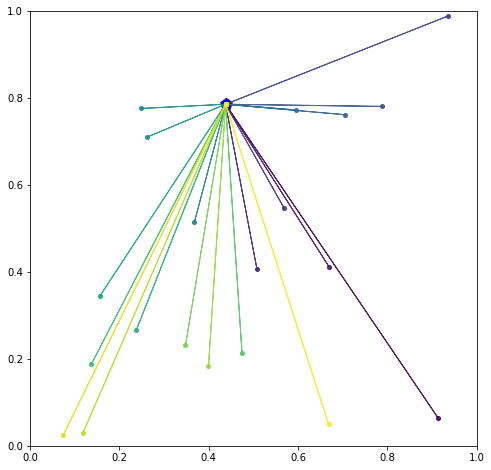


Obj Val: 27.4044
Routes:
   9
   18
   12
   6
   3
   0
   4
   8
   13
   2
   5->11
   16
   10
   7
   15
   19
   14
   17
   1
Time elpased: 0.4881 sec


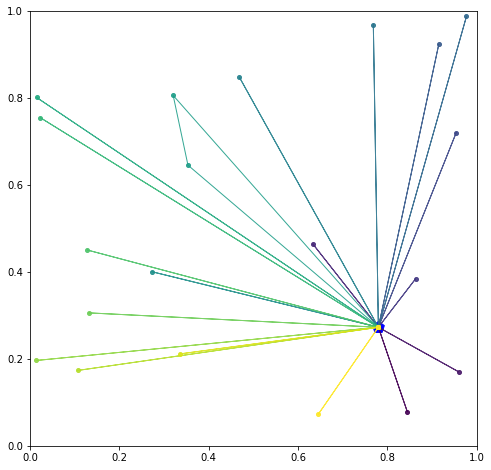

In [3]:
run(size=20)